# <div style="background-color:black;color:white;text-align:center;"><br>Employee Future Prediction<br><br></div>

# <span style="background-color:black;color:white">Table of Contents</span>

+ [Introduction](Introduction)
+ [About Dataset](About-Dataset)
+ [Data Exploration](Data-Exploration)
    1. How diverse are the Education levels of employees?
    2. How does the company fare at Gender Diversity?
    3. How is the Employee strength spread over office locations?
    4. Does Employee's Education affect Payment Tiers?
    5. Does Gender across Payment Tiers affect an Employee's decision whether he/she leaves the company or not?

# <span style="background-color:black;color:white">Introduction</span>

A company's HR department wants to predict whether some customers would leave the company in next 2 years. An interesting exploration that might help future employers build workflows and take decisions to prevent their favorite employees leaving their company.

# <span style="background-color:black;color:white">About Dataset</span>
This is the metadata to the dataset.
The data is a single CSV file with 9 attributes.

| Field | Description | DataType |
|-------|-------------|----------|
| Education|The highest level of formal education obtained by the employee| String|
| JoiningYear | Year of joining the company|Integer|
|City| Job location| String|
|PaymentTier|Payment Tier (1-3). 3 means better pay.| Integer|
|Age| Age of the employee| Integer
|Gender| Gender of the employee| String|
|EverBenched| Was the employee ever benched or not|Boolean|
|ExperienceInCurrentDomain| Work experience in the current company|Integer|
|LeaveOrNot|Weather the employee left the company in the next 2 years|Boolean|

# <span style="background-color:black;color:white">Data Exploration</span>
Now let us do the most interesting part, **data analysis**.
But before this let us import some required libraries.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("Employee.csv")
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## <div style="text-align:center;background-color:#282c34;color:#61dafb"><br>1. How diverse are the Education levels of employees?<br><br></div>

In [29]:
df_edu = data.groupby('Education')['Education'].agg(pd.Series.count)
l = df_edu.index
idx = []
for i in range(len(l)):
    idx.append(l[i]+" "+ str(round(df_edu[i]/data.shape[0] * 100, 2))+" % (" +str(df_edu[i])+ ")")

df_edu = pd.Series(list(df_edu), idx)

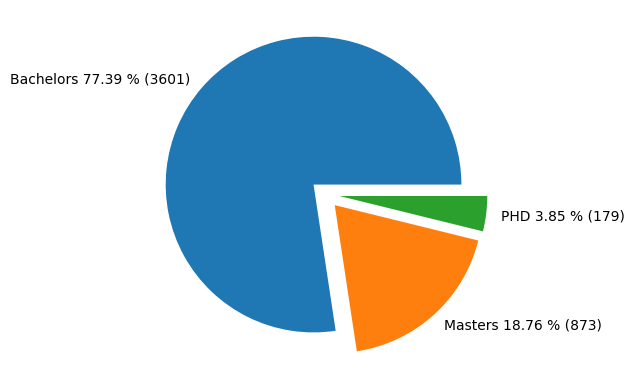

In [30]:

explode = (0.1, 0.1, 0.1)
plt.pie(df_edu,labels=df_edu.index, explode=explode)
plt.show()

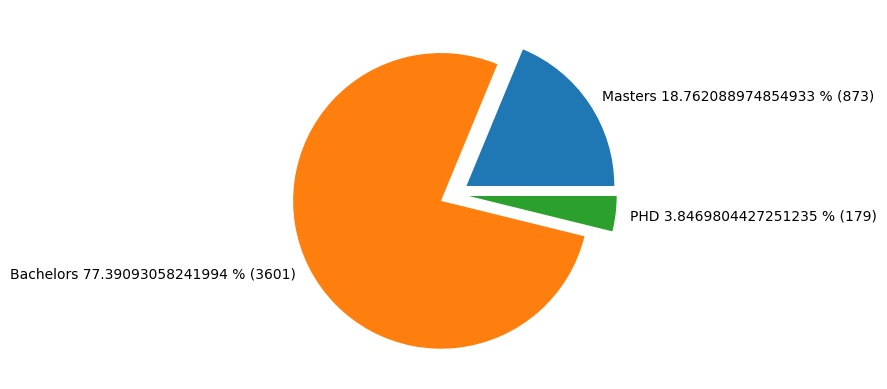

In [3]:
l,a=list(set(data["Education"])),[]
for i in range(len(l)):
    cnt = list(data["Education"]).count(l[i])
    a.append(cnt)
    l[i]=l[i]+ " "+ str(cnt*100/len(data["Education"]))+ " % (" +str(cnt)+ ")"
explode = (0.1, 0.1, 0.1)
plt.pie(a,labels=l, explode=explode)
plt.show()

<p style="font-size:1.2em;border:1px solid black;padding:3%;">
    Around <strong>77%</strong> of employees hold a <strong>Bachelors degree</strong>.<br>
    Around <strong>19% hold a Master's degree</strong>. <br>
    And only a mere around <strong>4%</strong> are <strong>PhDs</strong>. They might have been hired for their R&D Cell. It looks like this company doesn't spend much on R&D. Phew!
</p>

## <div style="text-align:center;background-color:#282c34;color:#61dafb"><br>2. How does the company fare at Gender Diversity?<br><br></div>

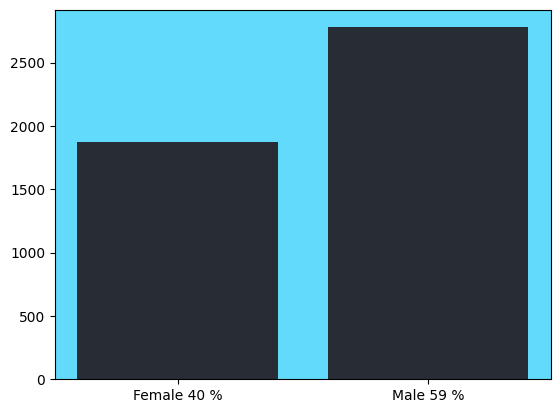

In [4]:
l,a=list(set(data["Gender"])),[]
for i in range(len(l)):
    a.append(list(data["Gender"]).count(l[i]))
    l[i]=l[i]+ " "+ str(int(list(data["Gender"]).count(l[i])*100/len(data["Gender"])))+" %"
plt.bar(l,a, color='#282c34', fill=True)
ax=plt.gca()
ax.set_facecolor('#61dafb')
plt.show()

<p style="font-size:1.2em;border:1px solid black;padding:3%;">
    Woah!Around <strong>59%</strong> of the workforce is <strong>Male</strong>.<br>
    And <strong>only 40-41% are Females</strong>. <br>
    Even though it's not an equity by a little margin, but yeah it is commendable to maintain such bigger female to male ratio in a world where female employment rates are very low.<br>
    <strong> Great work Indian Workplaces!</strong>
</p>

## <div style="text-align:center;background-color:#282c34;color:#61dafb"><br>3. How is the Employee strength spread over office locations?<br><br></div>

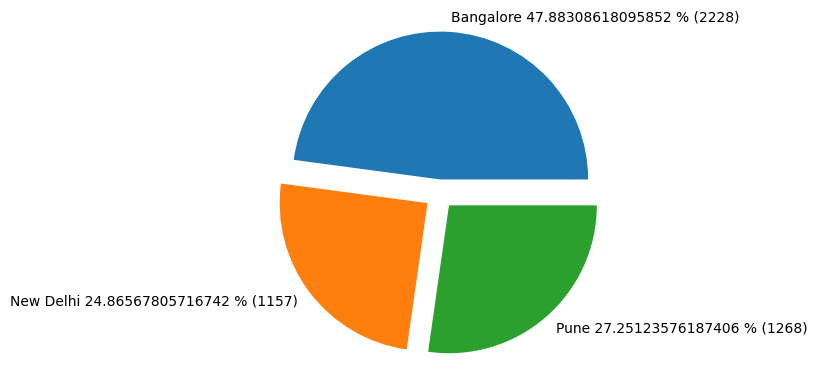

In [5]:
l,a=list(set(data["City"])),[]
for i in range(len(l)):
    a.append(list(data["City"]).count(l[i]))
    l[i]=l[i]+ " "+ str(list(data["City"]).count(l[i])*100/len(data["City"]))+ " % (" +str(list(data["City"]).count(l[i]))+ ")"
explode = (0.1, 0.1, 0.1)
plt.pie(a,labels=l, explode=explode)
plt.show()

<p style="font-size:1.2em;border:1px solid black;padding:3%;">
    Great! We can see nearly <strong>48%</strong> of the workforce is based in <strong>Bangalore only</strong>.<br>
    While New Delhi and Pune Offices share 25% and 27% of workforce respectively.<br>    <blockquote>
        One more thing to note the company has just 3 offices but having such a huge workforce of more than 45K employees. <b>Isn't it strange?</b>
        <br>
</p>

## <div style="text-align:center;background-color:#282c34;color:#61dafb"><br>4. Does Employee's Education affect Payment Tiers?<br><br></div>

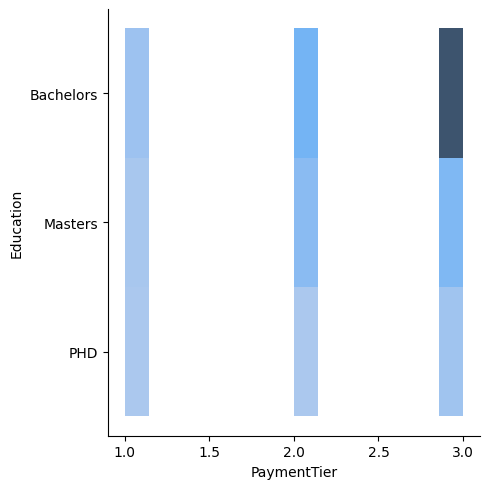

In [6]:
sns.displot(data=data, x="PaymentTier", y="Education")

## <div style="padding:10px;text-align:center;background-color:#282c34;color:#61dafb"><br>5. Does Gender across Payment Tiers affect an Employee's decision whether he/she leaves the company or not?<br><br></div>

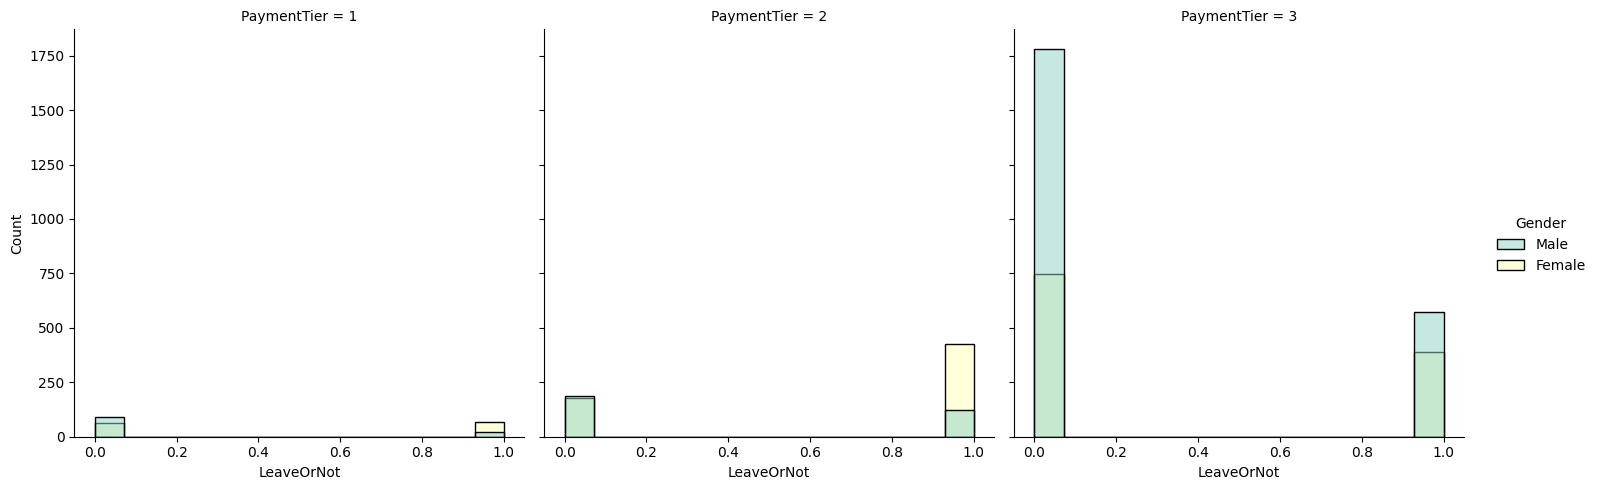

In [14]:
sns.displot(data=data, x="LeaveOrNot", legend=True, hue="Gender",col="PaymentTier",palette='Set3')

<div style="font-size:1.2em;border:1px solid black;padding:3%;">
    Okay! This one is pretty meaningful to us. Following conclusions can be made:<br>
    <ol>
        <li>In Payment Tier 1 (less paid jobs), more Female employees leave the job. Whereas more male members continue their jobs.</li>
        <li>In Payment Tier 2, once again more number of Females leave the job as compared to their male counterparts. And as seen in Tier 2, male members tend to stick to their company.<br>
        <li>But when it comes to Payment Tier 3, men defy all previous notions and change more jobs than their female counterparts.</li></ol>
</div>